# Will the US Experience a Recession within the Next Two Years?

By: Samir Chawla <br>
Original Publication Date: Monday April 18, 2022 *[UPDATED: Sunday May 1, 2022]*

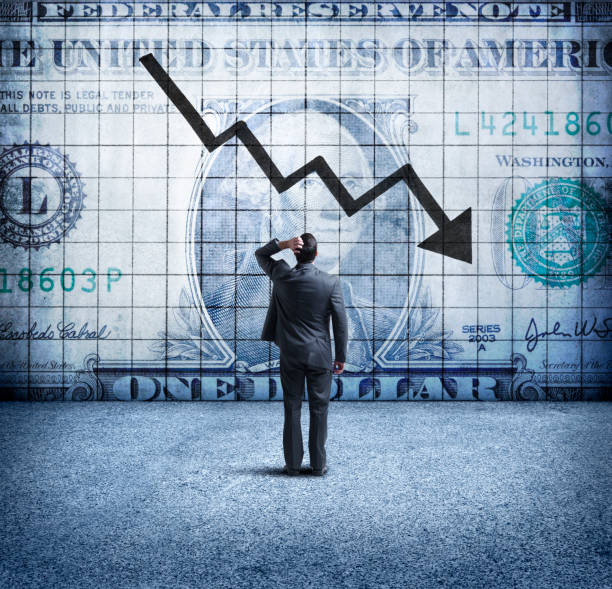

### Background Information

For the last 12 years the United States has seen an explosion of growth accross all sectors in the economy. Even in March 2020, when the markets were experiencing shock and uncertainty from Covid-19 the economy showed extreme resilliance. Of course, some of this can be creditied towards the US Federal Reserve and other central banks propping up the economy (and stock markets). With this massive money printing, we are now at a point where sentiment has turned bearish from rising prices in all essential goods like energy and food. Inflation has now turned into a major factor in the late performance of the US markets and has caused the US Federal Reserve to take a more hawkish tone by rising interest rates and reducing their balance sheet.

The current fears in the market are mounting to concearns of a possible recession on the horizon. But is a recession really in the cards for the US economy or will action from the Fed be able to keep the economy in check? We will attempt to answer this question in with this project. 

A recession is defined as two consecutive quarters of contracting GDP.  We will design an AI model to predict GDP numbers for the next 10 quarters and see if there is an upcoming recession based soley on the data.

### Breakdown of the Data Features to be Used

From research, I have identified the below data to use for our model as well as from where it is being sourced. We will use the indicators below that have particularly been known for being leading indicators meaning that they are known for identifying a recession before the actual recession begins.
<br>
<br>
**Inflation Rate:** Inflation figures or CPI (consumer price index) measures the rise of prices accross all consumer goods.  Historically inflation has not always been a main indicator of recessions but I have decided to include it as a feature because this is the main economic worry of the US population today.

**Shiller PE:** The Shiller indicator has always been a metric to measure if the market was over or undervalued by calculation the ratio of price to earnings. I think using this metric will be usefull to the model by being able to adjust the weight of how strong the stock market has been over the last 10+ years.

**Interest Rate:** The Interest Rate is the only feature that is directly controlled by the US Federal Reserve therefore, with direct control of this variable the Fed signals their own position on the economy. Therefore, for this reason it is included.

**Treasury Yields:** This is probably the most looked at indicator for those who try to predict future recessions. The 2 year and 10 year maturity are the most looked at when trying to make a prediction. In all past recessions the 2 year yield has fallen below the 10 year yield BUT there have also been instances of this happening without a recession following.

**Business Confidence Index:** Usually before any slowdown is noticed from the economic data it is noticed by business leaders. The business confidence index is from a monthly survey of businesses on their sentiments for the future.

**Gross Domestic Product(GDP):** The GDP numbers themselves measuring the total value of goods and services in the United States could have a pattern that will be useful to the model.
<br>
<br>

| <div align="left"> **Data Feature** |<div align="left"> **Data Source**|
|---|---|
|<div align="left"> US Inflation Rate |<div align="left">https://www.usinflationcalculator.com/inflation/historical-inflation-rates/ |
|<div align="left"> Shiller PE |<div align="left">https://data.nasdaq.com/data/MULTPL/SHILLER_PE_RATIO_MONTH-shiller-pe-ratio-by-month |
|<div align="left"> Interest Rate (Fed Funds rate) |<div align="left">https://fred.stlouisfed.org/series/FEDFUNDS |
|<div align="left"> Treasury Yields |<div align="left">https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=all |<div align="left"> 
|<div align="left"> Business Confidence Index |<div align="left">https://data.oecd.org/leadind/business-confidence-index-bci.htm |
|<div align="left"> GDP |<div align="left"> https://fred.stlouisfed.org/series/GDP |

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from functools import reduce
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam

# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

### Data Cleaning and Preperation

In the following sections I will clean all the selected data into a clean format that I can use to train the model. From a preinspection of the datasets we see that that earliest data is from Q1 1990 therefore, for any datasets with data before this time will be deleted.

**1. Inflation Data**

In [3]:
# Import Inflation Data
inflation_df = pd.read_csv(r"/content/drive/MyDrive/Colab Projects/GDPproject/Raw data/Inflation data.csv")

# Explore the raw inflation table
inflation_df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,AVE
0,1914,2.0,1.0,1.0,0.0,2.1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0
1,1915,1.0,1.0,0.0,2.0,2.0,2.0,1.0,-1.0,-1.0,1.0,1.0,2.0,1.0
2,1916,3.0,4.0,6.1,6.0,5.9,6.9,6.9,7.9,9.9,10.8,11.7,12.6,7.9
3,1917,12.5,15.4,14.3,18.9,19.6,20.4,18.5,19.3,19.8,19.5,17.4,18.1,17.4
4,1918,19.7,17.5,16.7,12.7,13.3,13.1,18.0,18.5,18.0,18.5,20.7,20.4,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2018,2.1,2.2,2.4,2.5,2.8,2.9,2.9,2.7,2.3,2.5,2.2,1.9,2.4
105,2019,1.6,1.5,1.9,2.0,1.8,1.6,1.8,1.7,1.7,1.8,2.1,2.3,1.8
106,2020,2.5,2.3,1.5,0.3,0.1,0.6,1.0,1.3,1.4,1.2,1.2,1.4,1.2
107,2021,1.4,1.7,2.6,4.2,5.0,5.4,5.4,5.3,5.4,6.2,6.8,7.0,4.7


Above has everything we need but it is not in the correct format so we will have to transpose the date into rows of the year and quarter.  In the above case the data for the quarters will be in the columns for months ("MAR", "JUN", "SEP", "DEC")

In [4]:
# CLEAN THE INFLATION DATA
#~~~~~~~~~~~~~~~~~~~~~~~~~

new_inflation_df = pd.DataFrame(columns=['year','quarter','inflation_rate'])
cr = 0
for i, row in inflation_df.iterrows():
    for q in range(1,5):
        new_inflation_df.at[cr, 'year'] = inflation_df.at[i, 'YEAR']
        if q == 1:
            new_inflation_df.at[cr, 'quarter'] = 1
            new_inflation_df.at[cr, 'inflation_rate'] = inflation_df.at[i, 'MAR']
        elif q == 2:
            new_inflation_df.at[cr, 'quarter'] = 2
            new_inflation_df.at[cr, 'inflation_rate'] = inflation_df.at[i, 'JUN']
        elif q == 3:
            new_inflation_df.at[cr, 'quarter'] = 3
            new_inflation_df.at[cr, 'inflation_rate'] = inflation_df.at[i, 'SEP']
        elif q == 4:
            new_inflation_df.at[cr, 'quarter'] = 4
            new_inflation_df.at[cr, 'inflation_rate'] = inflation_df.at[i, 'DEC'] 
        cr = cr + 1

# Delete records before 1990
new_inflation_df = new_inflation_df[new_inflation_df['year'] >= 1990]        

In [5]:
# View the cleaned inflation data
new_inflation_df

,year,quarter,inflation_rate
304,1990,1,5.2
305,1990,2,4.7
306,1990,3,6.2
307,1990,4,6.1
308,1991,1,4.9
...,...,...,...
431,2021,4,7.0
432,2022,1,8.5
433,2022,2,NaN
434,2022,3,NaN


**2. Shiller PE**

In [6]:
# Import Shiller PE
shiller_df = pd.read_csv(r"/content/drive/MyDrive/Colab Projects/GDPproject/Raw data/MULTPL-SHILLER_PE_RATIO_MONTH.csv")

# Sort by date
shiller_df = shiller_df.sort_values(by=['Date'])

# View the raw Shiller data
shiller_df

,Date,Value
1836,1871-02-01,10.92
1835,1871-03-01,11.19
1834,1871-04-01,12.05
1833,1871-05-01,12.59
1832,1871-06-01,12.59
...,...,...
4,2022-02-01,35.98
3,2022-02-28,35.80
2,2022-03-01,34.69
1,2022-03-31,36.71


We will clean the data by making the first of April, July, October and January the beginning of quarters 1,2,3 and 4.

In [7]:
# CLEAN THE SHILLER DATA
#~~~~~~~~~~~~~~~~~~~~~~~

# Delete all rows that do not correspond to the first day of the month
shiller_df['Date'] = pd.to_datetime(shiller_df['Date'], errors='coerce')
shiller_df = shiller_df[shiller_df['Date'].dt.strftime("%d") == '01']

# Copy all months from quarters into new dataframe
new_shiller_df = pd.DataFrame(columns=['year','quarter','shiller'])
shiller_df['Date'] = pd.to_datetime(shiller_df['Date'], errors='coerce')

# Reset Counter
cr=0

# Create rows
for i, rows in shiller_df.iterrows():
    if shiller_df.at[i,'Date'].strftime('%m') == '04':
        new_shiller_df.at[cr,'year'] = int(shiller_df.at[i, 'Date'].strftime("%Y"))
        new_shiller_df.at[cr,'quarter'] = 1
        new_shiller_df.at[cr,'shiller'] = shiller_df.at[i, 'Value']
        cr = cr + 1
    elif shiller_df.at[i,'Date'].strftime('%m') == '07':
        new_shiller_df.at[cr,'year'] = int(shiller_df.at[i, 'Date'].strftime("%Y"))
        new_shiller_df.at[cr,'quarter'] = 2
        new_shiller_df.at[cr,'shiller'] = shiller_df.at[i, 'Value']
        cr = cr + 1
    elif shiller_df.at[i,'Date'].strftime('%m') == '10':
        new_shiller_df.at[cr,'year'] = int(shiller_df.at[i, 'Date'].strftime("%Y"))
        new_shiller_df.at[cr,'quarter'] = 3
        new_shiller_df.at[cr,'shiller'] = shiller_df.at[i, 'Value']        
        cr = cr + 1 
    elif shiller_df.at[i,'Date'].strftime('%m') == '01': 
        new_shiller_df.at[cr,'year'] = int(shiller_df.at[i, 'Date'].strftime("%Y"))
        new_shiller_df.at[cr,'year'] = int(new_shiller_df.at[cr,'year']) -1
        new_shiller_df.at[cr,'quarter'] = 4
        new_shiller_df.at[cr,'shiller'] = shiller_df.at[i, 'Value']
        cr = cr + 1

# Delete records before 1990
new_shiller_df = new_shiller_df[new_shiller_df['year'] >= 1990]

In [8]:
# View the cleaned Shiller data
new_shiller_df

,year,quarter,shiller
476,1990,1,16.81
477,1990,2,17.75
478,1990,3,14.82
479,1990,4,15.61
480,1991,1,18.16
...,...,...,...
600,2021,1,36.72
601,2021,2,37.44
602,2021,3,37.25
603,2021,4,37.47


**3. Interest Rate**

In [9]:
# Import Interest Rate dataframe
ir_df = pd.read_csv(r"/content/drive/MyDrive/Colab Projects/GDPproject/Raw data/FEDFUNDS.csv")

# Sort by date
ir_df = ir_df.sort_values(by=['DATE'])

ir_df

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
808,2021-11-01,0.08
809,2021-12-01,0.08
810,2022-01-01,0.08
811,2022-02-01,0.08


We will clean the data by making the first of March, June, September and December the beginning of quarters 1,2,3 and 4.

In [10]:
# CLEAN THE INTEREST RATE DATA
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Copy all months from quarters into new dataframe
new_ir_df = pd.DataFrame(columns=['year','quarter','interest_rate'])
ir_df['DATE'] = pd.to_datetime(ir_df['DATE'], errors='coerce')

# Reset counter
cr=0

# Create the rows
for i, rows in ir_df.iterrows():
    if ir_df.at[i,'DATE'].strftime('%m') == '03':
        new_ir_df.at[cr,'year'] = int(ir_df.at[i, 'DATE'].strftime("%Y"))
        new_ir_df.at[cr,'quarter'] = 1
        new_ir_df.at[cr,'interest_rate'] = ir_df.at[i, 'FEDFUNDS']
        cr = cr + 1
    elif ir_df.at[i,'DATE'].strftime('%m') == '06':
        new_ir_df.at[cr,'year'] = int(ir_df.at[i, 'DATE'].strftime("%Y"))
        new_ir_df.at[cr,'quarter'] = 2
        new_ir_df.at[cr,'interest_rate'] = ir_df.at[i, 'FEDFUNDS']
        cr = cr + 1
    elif ir_df.at[i,'DATE'].strftime('%m') == '09':
        new_ir_df.at[cr,'year'] = int(ir_df.at[i, 'DATE'].strftime("%Y"))
        new_ir_df.at[cr,'quarter'] = 3
        new_ir_df.at[cr,'interest_rate'] = ir_df.at[i, 'FEDFUNDS']        
        cr = cr + 1 
    elif ir_df.at[i,'DATE'].strftime('%m') == '12': 
        new_ir_df.at[cr,'year'] = int(ir_df.at[i, 'DATE'].strftime("%Y"))
        new_ir_df.at[cr,'year'] = int(new_ir_df.at[cr,'year'])
        new_ir_df.at[cr,'quarter'] = 4
        new_ir_df.at[cr,'interest_rate'] = ir_df.at[i, 'FEDFUNDS']
        cr = cr + 1

# Delete records before 1990
new_ir_df = new_ir_df[new_ir_df['year'] >= 1990]

In [11]:
# View the cleaned interest rate data
new_ir_df

,year,quarter,interest_rate
142,1990,1,8.28
143,1990,2,8.29
144,1990,3,8.2
145,1990,4,7.31
146,1991,1,6.12
...,...,...,...
266,2021,1,0.07
267,2021,2,0.08
268,2021,3,0.08
269,2021,4,0.08


**4. Daily Treasury Yields**

In [12]:
# Import Treasury Yields dataframe
tr_df = pd.read_csv(r"/content/drive/MyDrive/Colab Projects/GDPproject/Raw data/daily-treasury-rates.csv")

# Sort by date
tr_df = tr_df.sort_values(by=['Date'])

# View the raw treasury yield data
tr_df

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1,1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
2,1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
3,1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
4,1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8071,2022-04-04,0.18,0.42,0.66,1.14,1.72,2.43,2.61,2.56,2.52,2.42,2.64,2.48
8072,2022-04-05,0.18,0.42,0.65,1.13,1.77,2.51,2.69,2.69,2.65,2.54,2.74,2.57
8073,2022-04-06,0.21,0.44,0.67,1.15,1.79,2.50,2.67,2.70,2.69,2.61,2.81,2.63
8074,2022-04-07,0.21,0.50,0.68,1.15,1.78,2.47,2.66,2.70,2.73,2.66,2.87,2.69


I will clean the data by making the last day of March, June, September and December quarters 1, 2, 3 and 4. I will also only select the column for the 2yr and 10yr treasury yields as these are the most relevant.

In [13]:
# CLEAN THE TREASURY YIELD DATA
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Copy all months from quarters into new dataframe
new_tr_df = pd.DataFrame(columns=['year','quarter','2yr_yield', '10yr_yield'])
tr_df['Date'] = pd.to_datetime(tr_df['Date'], errors='coerce')

# Reset the counter
cr=0

# Create the rows
for i, rows in tr_df.iterrows():
    c_year = tr_df.at[i, 'Date'].strftime("%Y")
    if tr_df.at[i,'Date'].strftime("%m") == '03':
        new_tr_df.at[cr, 'year'] = int(c_year)
        new_tr_df.at[cr, 'quarter'] = 1
        if tr_df.at[i,'Date'].strftime("%m") != tr_df.at[i+1,'Date'].strftime("%m"):
            new_tr_df.at[cr,'2yr_yield'] = tr_df.at[i, '2 Yr']
            new_tr_df.at[cr,'10yr_yield'] = tr_df.at[i, '10 Yr']
            cr = cr + 1
    elif tr_df.at[i,'Date'].strftime("%m") == '06':
        new_tr_df.at[cr, 'year'] = int(c_year)
        new_tr_df.at[cr, 'quarter'] = 2
        if tr_df.at[i,'Date'].strftime("%m") != tr_df.at[i+1,'Date'].strftime("%m"):
            new_tr_df.at[cr,'2yr_yield'] = tr_df.at[i, '2 Yr']
            new_tr_df.at[cr,'10yr_yield'] = tr_df.at[i, '10 Yr']
            cr = cr + 1
    elif tr_df.at[i,'Date'].strftime("%m") == '09':
        new_tr_df.at[cr, 'year'] = int(c_year)
        new_tr_df.at[cr, 'quarter'] = 3
        if tr_df.at[i,'Date'].strftime("%m") != tr_df.at[i+1,'Date'].strftime("%m"):
            new_tr_df.at[cr,'2yr_yield'] = tr_df.at[i, '2 Yr']
            new_tr_df.at[cr,'10yr_yield'] = tr_df.at[i, '10 Yr']
            cr = cr + 1
    elif tr_df.at[i,'Date'].strftime("%m") == '12':
        new_tr_df.at[cr, 'year'] = int(c_year)
        new_tr_df.at[cr, 'quarter'] = 4
        if tr_df.at[i,'Date'].strftime("%m") != tr_df.at[i+1,'Date'].strftime("%m"):
            new_tr_df.at[cr,'2yr_yield'] = tr_df.at[i, '2 Yr']
            new_tr_df.at[cr,'10yr_yield'] = tr_df.at[i, '10 Yr']
            cr = cr + 1

# Delete records before 1990
new_tr_df = new_tr_df[new_tr_df['year'] >= 1990]

In [14]:
# View clean treasury yield data
new_tr_df

,year,quarter,2yr_yield,10yr_yield
0,1990,1,8.64,8.65
1,1990,2,8.24,8.43
2,1990,3,8.02,8.82
3,1990,4,7.15,8.08
4,1991,1,7.02,8.05
...,...,...,...,...
124,2021,1,0.16,1.74
125,2021,2,0.25,1.45
126,2021,3,0.28,1.52
127,2021,4,0.73,1.52


**5. Business Confidence Index**

In [15]:
# Import business confidence index
bc_df = pd.read_csv(r"/content/drive/MyDrive/Colab Projects/GDPproject/Raw data/DP_LIVE_12042022191839947.csv")

# Filter only US results
bc_df = bc_df[bc_df['LOCATION'] == 'USA']

# View the raw BCI data
bc_df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
8288,USA,BCI,AMPLITUD,LTRENDIDX,M,Jan-50,101.1181,NaN
8289,USA,BCI,AMPLITUD,LTRENDIDX,M,Feb-50,101.6754,NaN
8290,USA,BCI,AMPLITUD,LTRENDIDX,M,Mar-50,102.4184,NaN
8291,USA,BCI,AMPLITUD,LTRENDIDX,M,Apr-50,103.4770,NaN
8292,USA,BCI,AMPLITUD,LTRENDIDX,M,May-50,104.5441,NaN
...,...,...,...,...,...,...,...,...
9150,USA,BCI,AMPLITUD,LTRENDIDX,M,Nov-21,101.5673,NaN
9151,USA,BCI,AMPLITUD,LTRENDIDX,M,Dec-21,101.3340,NaN
9152,USA,BCI,AMPLITUD,LTRENDIDX,M,Jan-22,101.1386,NaN
9153,USA,BCI,AMPLITUD,LTRENDIDX,M,Feb-22,101.0311,NaN


We will only select the rows for the months March, June, September and December that will be quarters 1, 2, 3 and 4.

In [16]:
# CLEAN THE BUSINESS CONFIDENCE INDEX DATA
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Split Month and Year into 'year' and 'month' column
bc_df[['month','year']] = bc_df['TIME'].apply(lambda x: pd.Series(str(x).split("-")))
bc_df = bc_df[['year', 'month', 'Value']]

# Adjust year to be 4 digits
for i, rows in bc_df.iterrows():
    if int(bc_df.at[i,'year']) >= 50 and int(bc_df.at[i,'year']) < 100:
        bc_df.at[i,'year'] = int(bc_df.at[i,'year']) + 1900
    else:
        bc_df.at[i,'year'] = int(bc_df.at[i,'year']) + 2000

# Create the new bci dataset
new_bc_df = pd.DataFrame(columns=['year','quarter','bci'])

# Reset the counter
cr = 0

# Create the rows
for i, rows in bc_df.iterrows():
    if bc_df.at[i,'month'] == "Mar":
        new_bc_df.at[cr, 'year'] = bc_df.at[i,'year']
        new_bc_df.at[cr, 'quarter'] = 1
        new_bc_df.at[cr, 'bci'] = bc_df.at[i,'Value']
        cr = cr + 1
    elif bc_df.at[i,'month'] == "Jun":
        new_bc_df.at[cr, 'year'] = bc_df.at[i,'year']
        new_bc_df.at[cr, 'quarter'] = 2
        new_bc_df.at[cr, 'bci'] = bc_df.at[i,'Value']
        cr = cr + 1
    elif bc_df.at[i,'month'] == "Sep":
        new_bc_df.at[cr, 'year'] = bc_df.at[i,'year']
        new_bc_df.at[cr, 'quarter'] = 3
        new_bc_df.at[cr, 'bci'] = bc_df.at[i,'Value']
        cr = cr + 1
    elif bc_df.at[i,'month'] == "Dec":
        new_bc_df.at[cr, 'year'] = bc_df.at[i,'year']
        new_bc_df.at[cr, 'quarter'] = 4
        new_bc_df.at[cr, 'bci'] = bc_df.at[i,'Value']
        cr = cr + 1

# Delete records before 1990
new_bc_df = new_bc_df[new_bc_df['year'] >= 1990]

In [17]:
# View clean BCI data
new_bc_df

,year,quarter,bci
160,1990,1,99.16814
161,1990,2,98.94698
162,1990,3,98.00126
163,1990,4,97.06994
164,1991,1,97.16747
...,...,...,...
284,2021,1,102.0131
285,2021,2,101.6215
286,2021,3,101.6534
287,2021,4,101.334


**6. GDP (Y Value)**

In [18]:
# Import GDP dataframe
gdp_df = pd.read_csv(r"/content/drive/MyDrive/Colab Projects/GDPproject/Raw data/GDP.csv")

# Sort by date
gdp_df = gdp_df.sort_values(by=['DATE'])

# View raw GDP data
gdp_df

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
295,2020-10-01,21477.597
296,2021-01-01,22038.226
297,2021-04-01,22740.959
298,2021-07-01,23202.344


In [19]:
# CLEAN THE GDP INDEX DATA
#~~~~~~~~~~~~~~~~~~~~~~~~~


# Copy all months from quarters into new dataframe
new_gdp_df = pd.DataFrame(columns=['year','quarter','gdp'])
gdp_df['DATE'] = pd.to_datetime(gdp_df['DATE'], errors='coerce')

# Reset the counter
cr=0

# Create the rows
for i, rows in gdp_df.iterrows():
    if gdp_df.at[i,'DATE'].strftime('%m') == '01':
        new_gdp_df.at[cr,'year'] = int(gdp_df.at[i, 'DATE'].strftime("%Y"))
        new_gdp_df.at[cr,'quarter'] = 1
        new_gdp_df.at[cr,'gdp'] = gdp_df.at[i, 'GDP']
        cr = cr + 1
    elif gdp_df.at[i,'DATE'].strftime('%m') == '04':
        new_gdp_df.at[cr,'year'] = int(gdp_df.at[i, 'DATE'].strftime("%Y"))
        new_gdp_df.at[cr,'quarter'] = 2
        new_gdp_df.at[cr,'gdp'] = gdp_df.at[i, 'GDP']
        cr = cr + 1
    elif gdp_df.at[i,'DATE'].strftime('%m') == '07':
        new_gdp_df.at[cr,'year'] = int(gdp_df.at[i, 'DATE'].strftime("%Y"))
        new_gdp_df.at[cr,'quarter'] = 3
        new_gdp_df.at[cr,'gdp'] = gdp_df.at[i, 'GDP']        
        cr = cr + 1 
    elif gdp_df.at[i,'DATE'].strftime('%m') == '10': 
        new_gdp_df.at[cr,'year'] = int(gdp_df.at[i, 'DATE'].strftime("%Y"))
        new_gdp_df.at[cr,'year'] = int(new_gdp_df.at[cr,'year']) #-1
        new_gdp_df.at[cr,'quarter'] = 4
        new_gdp_df.at[cr,'gdp'] = gdp_df.at[i, 'GDP']
        cr = cr + 1

# Delete records before 1990
new_gdp_df = new_gdp_df[new_gdp_df['year'] >= 1990]

**UPDATED Special Note:**
Actual GDP was a surprice of -1.4% instead of the projected 1.7%.  I have updated the model with the new figures. https://www.cnbc.com/2022/04/28/us-q1-gdp-growth.html   

As of the original date of this project April 12, 2022 the Q1 figures for GDP were not officially released, therefore I used the Conference Board estimate of a 1.7% growth. https://www.conference-board.org/research/us-forecast#:~:text=The%20Conference%20Board%20forecasts%20that,year%2Dover%2Dyear).

In [20]:
# Create a row -1.4% growth to end of new_gdp_df
estimate = new_gdp_df.iat[-1,2]*0.017

new_row = {'year': int(2022), 'quarter': int(1), 'gdp':new_gdp_df.iat[-1,2]-estimate}

# Append the new row with the gdp_df
new_gdp_df = new_gdp_df.append(new_row, ignore_index=True)

# View the clean GDP data
new_gdp_df

,year,quarter,gdp
0,1990,1,5872.701
1,1990,2,5960.028
2,1990,3,6015.116
3,1990,4,6004.733
4,1991,1,6035.178
...,...,...,...
124,2021,1,22038.226
125,2021,2,22740.959
126,2021,3,23202.344
127,2021,4,24002.815


### Joining all the Dataframes

Here I will join all the seperate clean dataframes into one combined dataframe on the 'year' and 'quarter' column.

In [21]:
data_frames = [new_inflation_df, new_shiller_df, new_ir_df, new_tr_df, new_bc_df, new_gdp_df]
clean_df = reduce(lambda  left,right: pd.merge(left,right,on=['year','quarter'],
                                            how='inner'), data_frames)

# View final clean dataframe
clean_df

,year,quarter,inflation_rate,shiller,interest_rate,2yr_yield,10yr_yield,bci,gdp
0,1990,1,5.2,16.81,8.28,8.64,8.65,99.16814,5872.701
1,1990,2,4.7,17.75,8.29,8.24,8.43,98.94698,5960.028
2,1990,3,6.2,14.82,8.2,8.02,8.82,98.00126,6015.116
3,1990,4,6.1,15.61,7.31,7.15,8.08,97.06994,6004.733
4,1991,1,4.9,18.16,6.12,7.02,8.05,97.16747,6035.178
...,...,...,...,...,...,...,...,...,...
124,2021,1,2.6,36.72,0.07,0.16,1.74,102.0131,22038.226
125,2021,2,5.4,37.44,0.08,0.25,1.45,101.6215,22740.959
126,2021,3,5.4,37.25,0.08,0.28,1.52,101.6534,23202.344
127,2021,4,7.0,37.47,0.08,0.73,1.52,101.334,24002.815


### Final Data Preperations for the LSTM Model

Finally our combined cleaned data just needs to be scaled and converted into a 3 dimensional array for our LSTM model to train.

In [22]:
# Min Max Scale Data
scaled_data = clean_df.iloc[:,2:]
scaler = StandardScaler()
scaler.fit(scaled_data)
scaled_data = scaler.fit_transform(scaled_data)

# Create Timeseries data
n_features = 7   # Number of days we want to look into the future based on the past days.
n_input = 16  # Number of past days we want to use to predict the future.
n_future = 1
n_preds = 10

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

for i in range(n_input, len(scaled_data) - n_future +1):
    trainX.append(scaled_data[i - n_input:i, 0:scaled_data.shape[1]])
    trainY.append(scaled_data[i + n_future - 1:i + n_future, 6])

# Convert trainX, trainY to numpy arrays for training    
trainX, trainY = np.array(trainX), np.array(trainY)

### LSTM Model

All our data has now been prepared. And here I will define the archieture of the working model.  Unfortunatley, our data is very limited so will we use all our data for training while measuring the loss.

In [23]:
model=Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='softplus'))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16, 64)            18432     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                400       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

### Train the Model

In [24]:
# Train our model and store loss results in 'history'
history = model.fit(trainX, trainY, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
4/4 [==============================] - 3s 17ms/step - loss: 0.8643
Epoch 2/150
4/4 [==============================] - 0s 17ms/step - loss: 0.8401
Epoch 3/150
4/4 [==============================] - 0s 16ms/step - loss: 0.8121
Epoch 4/150
4/4 [==============================] - 0s 21ms/step - loss: 0.7531
Epoch 5/150
4/4 [==============================] - 0s 15ms/step - loss: 0.6774
Epoch 6/150
4/4 [==============================] - 0s 15ms/step - loss: 0.6050
Epoch 7/150
4/4 [==============================] - 0s 18ms/step - loss: 0.5246
Epoch 8/150
4/4 [==============================] - 0s 15ms/step - loss: 0.5385
Epoch 9/150
4/4 [==============================] - 0s 16ms/step - loss: 0.4538
Epoch 10/150
4/4 [==============================] - 0s 17ms/step - loss: 0.4420
Epoch 11/150
4/4 [==============================] - 0s 16ms/step - loss: 0.4553
Epoch 12/150
4/4 [==============================] - 0s 15ms/step - loss: 0.4789
Epoch 13/150
4/4 [==============================]

### Evaluate Loss Performance

Here I calculate the loss of the model to evaluate the loss.

dict_keys(['loss'])


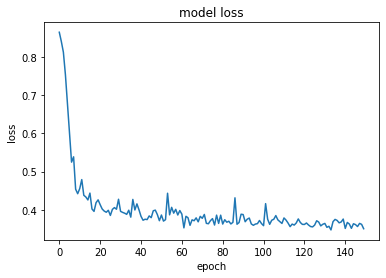

In [25]:
# History Plot of Model (accuracy/loss)

# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### Model Predictions

In [26]:
# Make the prediction
prediction = model.predict(trainX[-n_preds:]) #shape = (n, 1) where n is the n_days_for_prediction

# Create copies in columns to inverse transform 
prediction_copies = np.repeat(prediction, 7, axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,6]

# Create a new dataframe for the predictions
fr_df = pd.DataFrame(columns=['year','quarter','GDP'])

y = 2022
q = 2

for i in range(len(y_pred_future)):
    fr_df.at[i, 'year'] = y
    fr_df.at[i, 'quarter'] = q
    fr_df.at[i, 'GDP'] = int(y_pred_future[i])
    if q == 4:
        q = 0
        y = y + 1
    q = q + 1
    
# View our final results    
fr_df

,year,quarter,GDP
0,2022,2,20573
1,2022,3,20532
2,2022,4,20407
3,2023,1,20355
4,2023,2,20510
5,2023,3,20839
6,2023,4,21351
7,2024,1,21859
8,2024,2,22328
9,2024,3,22705


### Visualization of Results

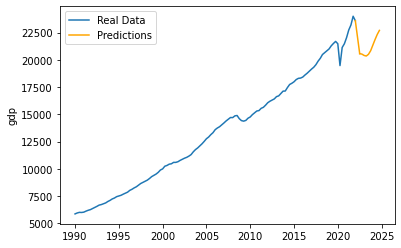

In [27]:
fig, ax = plt.subplots()

# Graph our results into a line graph
sns.lineplot(clean_df.index, clean_df['gdp'])
sns.lineplot(fr_df.index+1 + len(clean_df), fr_df['GDP'], color='orange')

x_values = [len(clean_df.index)-1, len(clean_df.index)+1]
y_values = [clean_df.at[clean_df.shape[0]-1,'gdp'], fr_df.at[0,'GDP']]

ax.set_xticklabels([1985,1990,1995,2000,2005,2010,2015,2020,2025])
plt.legend(labels=['Real Data', 'Predictions'])
plt.plot(x_values, y_values, color='orange')

### Analysis of Results UPDATED on Actual Q2 GDP Numbers

The actual Q1 GDP number was way off expecations but have not changed the model by much. I can now say that I put more faith on this model than I did before April 28 as we may already be in a recession. The magnitude for the GDP shrinkage for Q2 is still quite surprising but the downward trajectory appears to be following through. I believe the model is still holding a bias from the drop in the 2Q of 2020 when Covid first hit. But even with that consideration the model may still see a relationship in all our data which indicated a GDP slowdown.

I will continue to watch GDP for Q2 numbers and will revisit this model in June when the numbers are out.
